# Example

In [ ]:
import pycellid as ld
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
base_dir = os.path.join(".","samples_cellid")
data_dir = os.path.join(base_dir,"pydata","df.csv")
data = pd.read_csv(data_dir)

In [3]:
cells = ld.CellData(base_dir,data)

### Inspección de los datos

In [4]:
cells.size

2255436

In [5]:
cells.shape

(18189, 124)

In [6]:
cells.columns[0:14].to_list()

['pos',
 't_frame',
 'ucid',
 'cellID',
 'time',
 'xpos',
 'ypos',
 'a_tot',
 'num_pix',
 'fft_stat',
 'perim',
 'maj_axis',
 'min_axis',
 'a_nucl']

### Filtrado de los datos
para descartar células fuera de foco, células muertas o aquellas células outliers para el experimento

<AxesSubplot:>

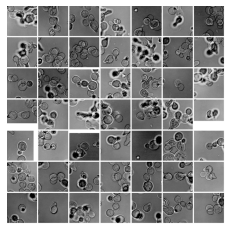

In [7]:
cells.plot(array_img_kws={"channel":"tfp", "n":49, "criteria":{"a_tot":[0, 500]}})

<AxesSubplot:>

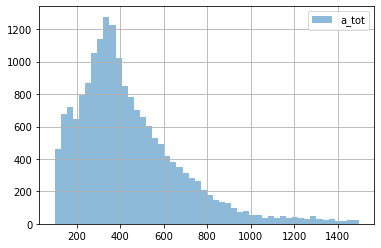

In [8]:
cells.a_tot.hist(bins=50, alpha=0.5, legend=True)

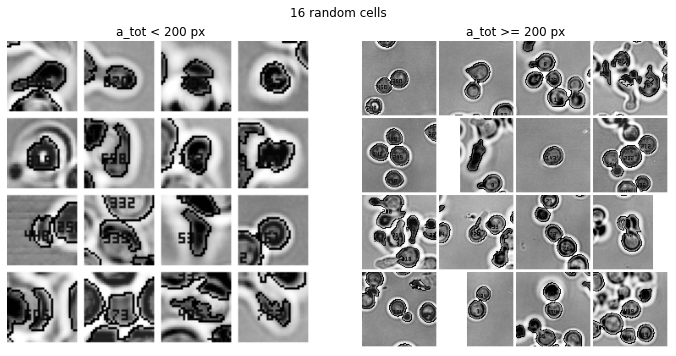

In [9]:
# initialize your figure
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

# Filtering your data
cells[cells["a_tot"]<200].plot(ax=axs[0])
cells[cells["a_tot"]>=200].plot(ax=axs[1])

# titles
plt.suptitle('16 random cells')
axs[0].set_title('a_tot < 200 px')
axs[1].set_title('a_tot >= 200 px')

# customize your output
fig.tight_layout()

In [10]:
ploter = ld.CellsPloter(cells)

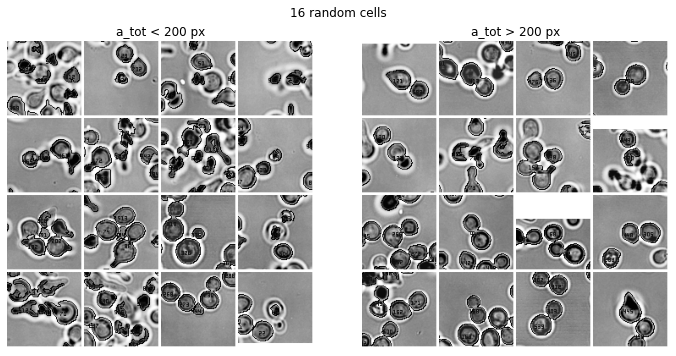

In [11]:
# initialize your figure
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

a_max = cells['a_tot'].max()

# Filtering your data
ploter.cells_image(array_img_kws={'n':16,'criteria':{'a_tot':[0.0,150]}},ax=axs[0])
ploter.cells_image(array_img_kws={'n':16,'criteria':{'a_tot':[150,a_max]}},ax=axs[1])

# titles
plt.suptitle('16 random cells')
axs[0].set_title('a_tot < 200 px')
axs[1].set_title('a_tot > 200 px')

# customize your output
fig.tight_layout()

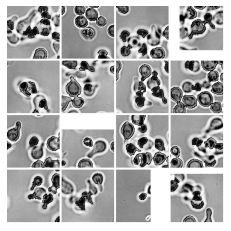

In [12]:
a_tot_l = ploter.cells_image({"criteria":{"a_tot":[0,200]}})

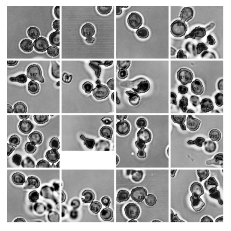

In [13]:
a_tot_h = ploter.cells_image({"criteria":{"a_tot":[200,a_max]}})

<AxesSubplot:>

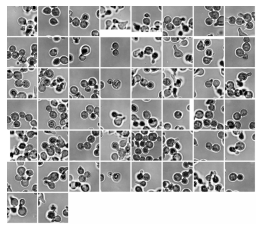

In [14]:
ploter.cells_image({"n":50})

In [16]:
cells['ucid'].unique()[0:200]

array([100000000000, 100000000007, 100000000010, 100000000012,
       100000000013, 100000000015, 100000000024, 100000000030,
       100000000038, 100000000039, 100000000040, 100000000042,
       100000000044, 100000000045, 100000000046, 100000000047,
       100000000049, 100000000050, 100000000060, 100000000062,
       100000000068, 100000000074, 100000000075, 100000000076,
       100000000077, 100000000079, 100000000083, 100000000084,
       100000000085, 100000000092, 100000000100, 100000000102,
       100000000103, 100000000105, 100000000107, 100000000108,
       100000000109, 100000000110, 100000000111, 100000000116,
       100000000120, 100000000123, 100000000125, 100000000130,
       100000000132, 100000000133, 100000000134, 100000000137,
       100000000142, 100000000143, 100000000148, 100000000151,
       100000000152, 100000000155, 100000000156, 100000000157,
       100000000159, 100000000160, 100000000162, 100000000163,
       100000000164, 100000000170, 100000000174, 100000

In [17]:
cells["maj_axis"].describe()

count    18189.000000
mean        28.362692
std         10.433144
min          3.343855
25%         20.955810
50%         25.280250
75%         34.729460
max         92.609380
Name: maj_axis, dtype: float64

<AxesSubplot:>

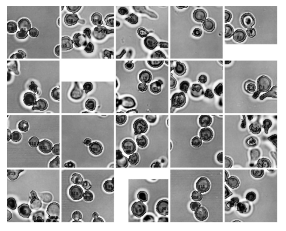

In [18]:
ploter.cells_image({"n":20,"criteria":{"maj_axis":[10,20]}})

<AxesSubplot:>

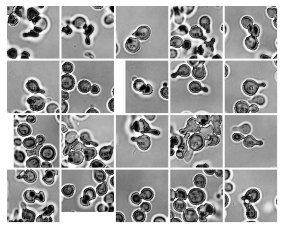

In [19]:
ploter.cells_image({"n":20,"criteria":{"maj_axis":[30,40]}})

<AxesSubplot:>

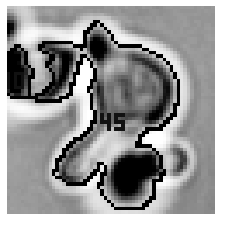

In [20]:
indentifier = { "channel":"BF", "ucid":100000000045, "t_frame":11}
box_img_kws = {"radius":30}
ploter.cimage( indentifier,box_img_kws = box_img_kws)

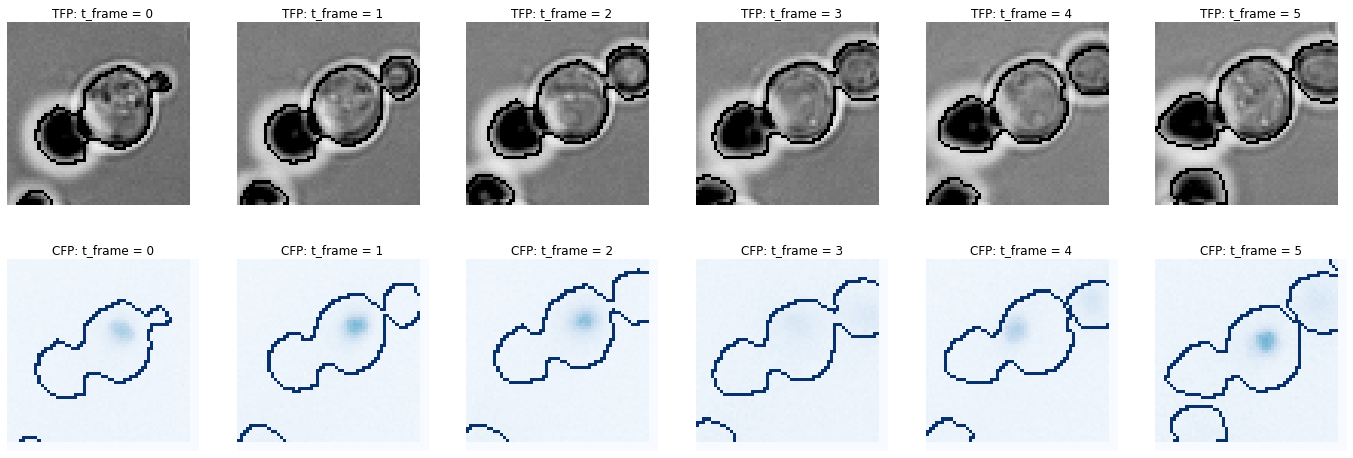

In [29]:
ucid = 100000000047
box_img_kws = {"radius":30}

# initialize your figure
fig, axs = plt.subplots(2, 6)
fig.set_size_inches(24, 8)

channels = ["TFP", "CFP"]
cmaps = ["Greys", "Blues"]

for j, c in enumerate(channels):
    imshow_kws = None
    imshow_kws = {"cmap": cmaps[j]}
    for i in range(6):
        indentifier = { "channel":c, "ucid":ucid, "t_frame":i}
        ploter.cimage( indentifier, box_img_kws = box_img_kws, imshow_kws=imshow_kws, ax=axs[j,i])
        titles = f'{c}: t_frame = {i}'
        axs[j,i].set_title(titles)